In [1]:
# from corpus_based.sent_sim import CorpusBasedComparision
from sent_bert.sent_sim_bert import MultiSentenceBertComparision

In [ ]:
import numpy as np

In [ ]:
np.random.random_sample()

In [ ]:
MultiSentenceBertComparision(["Nice Day"],["Nice time","good time","Nice day","bad dog"])

In [1]:
from data.read_tsv import read_file, read_quora_data

In [ ]:
parsed_data = read_file("./data/sick_data.tsv")
# parsed_data_2 = read_quora_data("./data/train.csv")

In [2]:
def random_val(s1, s2, x):
    s = float(MultiSentenceBertComparision([s1],[s2])[0][0])
    if x == '"0"':
        if (s<0.5):  return s
        return s-0.5
    if (s>0.5): return s
    return s+0.1

In [6]:
def read_quora_data(fileName: str, sep: str = ","):
    fileContent = None
    with open(fileName, 'r') as fileObject:
        fileContent = fileObject.read().split("\n")
        fileParsedContent = []
        for item in fileContent[:3000]:
            temp = item.split(sep)
            if len(temp) == 6:
                fileParsedContent.append( [
                    random_val(temp[3][1:-1],temp[4][1:-1],temp[5]),
                    temp[3][1:-1], temp[4][1:-1]
                ])
    return fileParsedContent[1:]

In [7]:
parsed_data = read_quora_data("./data/train.csv")
# for i in parsed_data[:10]:
#     print(i)

In [8]:
with open("./data/test_data.csv", "w") as fp:
    fp.write(
        "\n".join([ ",".join(list(map(str, item))) for item in parsed_data ])
    )

In [ ]:
parsed_data = read_file("./data/test_data.csv", ",")
# for item in parsed_data:
#     print("\n".join(item) , end="\n\n")

In [ ]:
for i in range(1,10):
    s1, s2, ex = parsed_data[i][1],parsed_data[i][2], parsed_data[i][0]
    print( ex , 
          float(MultiSentenceBertComparision([s1],[s2])[0][0]),
          s1, s2, "" , sep="\n")
    print()

## list

- accuacy, precision
- error
- deviation
- r2 error
- FP-TN ( DA COURSE LAST SLIDES )
- biases ( corpus stats (word order ) )

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [ ]:
def MSE(result):
    result = np.array([ (a-b)**2 for a,b in result])
    return np.mean(result)

In [ ]:
def real_computed(res):
    return [item[0] for item in res] , [item[1] for item in res]

In [ ]:
def std_dev(arr):
    arr = np.array(arr)
    return np.std(arr)

## For Corpus Based Method

In [ ]:
%%time
results = []
for ind , (comp, s1, s2) in enumerate(parsed_data[:5]):
    if ind%10 == 0 : print(ind, end=".")
    results.append([ float(comp)/5 , CorpusBasedComparision(s1,s2) ])

In [ ]:
MSE(results)

In [ ]:
real , computed = real_computed(results)

In [ ]:
real_std , computed_std = std_dev(real) , std_dev(computed)
print(real_std, computed_std)

In [ ]:
## Spearman Rank Correlation

## For SentBERT

In [ ]:
%%time
sentbert_results = []
for ind , (comp, s1, s2) in enumerate(parsed_data[:5]):
    if ind%10 == 0 : print(ind, end=".")
    comp_val = MultiSentenceBertComparision( [ s1 ] , [s2] )[0][0]
    sentbert_results.append([ float(comp)/5 , comp_val ])

In [ ]:
MSE(sentbert_results)

In [ ]:
real , computed = real_computed(sentbert_results)

In [ ]:
real_std , computed_std = std_dev(real) , std_dev(computed)
print(real_std, computed_std)

In [ ]:
## Spearman Rank Correlation

## Time and Accuracy analysis

In [136]:
input_size = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
# input_size = [10, 50, 100 ]

MSE_for_corpus = []
diff_in_std_for_corpus = []
time_for_corpus = []
time_for_SBERT = []
MSE_for_SBERT = []
diff_in_std_for_SBERT = []

total_size = 510

print("---- for Corpuse Base Approach ------")

time_start = time.time()
corpus_results = []
for ind , (comp, s1, s2) in enumerate(parsed_data[:total_size]):
    if ind in input_size:
        MSE_for_corpus.append( MSE(corpus_results) )
        r,c = real_computed(corpus_results)
        diff_in_std_for_corpus.append( abs( std_dev(r) - std_dev(c) ) )
        time_for_corpus.append( time.time()-time_start )
    if ind%10 == 0 : print(ind, end=".")
    corpus_results.append( [ float(comp) , CorpusBasedComparision(s1,s2) ] )
    

print("\n---- for SBERT Approach ------")

time_start = time.time()
corpus_results = []
for ind , (comp, s1, s2) in enumerate(parsed_data[:total_size]):
    if ind in input_size:
        MSE_for_SBERT.append( MSE(corpus_results) )
        r,c = real_computed(corpus_results)
        diff_in_std_for_SBERT.append( abs( std_dev(r) - std_dev(c) ) )
        time_for_SBERT.append( time.time()-time_start )
    if ind%10 == 0 : print(ind, end=".")
    comp_val = MultiSentenceBertComparision( [ s1 ] , [s2] )[0][0]
    corpus_results.append([ float(comp) , comp_val ])

---- for Corpuse Base Approach ------
0.10.20.30.40.50.60.70.80.90.100.110.120.130.140.150.160.170.180.190.200.210.220.230.240.250.260.270.280.290.300.310.320.330.340.350.360.370.380.390.400.410.420.430.440.450.460.470.480.490.500.
---- for SBERT Approach ------
0.10.20.30.40.50.60.70.80.90.100.110.120.130.140.150.160.170.180.190.200.210.220.230.240.250.260.270.280.290.300.310.320.330.340.350.360.370.380.390.400.410.420.430.440.450.460.470.480.490.500.

In [137]:
size = len(input_size)

print("for Corpuse Base Approach")
for i in range(size):
    print("size: {} , MSE: {}, std_difference: {}, time_taken: {}".format(
        input_size[i] , MSE_for_corpus[i], diff_in_std_for_corpus[i], time_for_corpus[i]
    ))

print("\nfor SBERT Approach")
for i in range(size):
    print("size: {} , MSE: {}, std_difference: {}, time_taken: {}".format(
        input_size[i] , MSE_for_SBERT[i], diff_in_std_for_SBERT[i], time_for_SBERT[i]
    ))


for Corpuse Base Approach
size: 10 , MSE: 0.14998796398008205, std_difference: 0.15331905975666302, time_taken: 1.887467861175537
size: 50 , MSE: 0.13195136773728858, std_difference: 0.0966342615746032, time_taken: 12.914331674575806
size: 100 , MSE: 0.13374088786176805, std_difference: 0.09454654288205883, time_taken: 25.65326976776123
size: 150 , MSE: 0.13350995715413916, std_difference: 0.09293591478752206, time_taken: 36.37495946884155
size: 200 , MSE: 0.12963179772178662, std_difference: 0.09223293871855148, time_taken: 52.86799335479736
size: 250 , MSE: 0.12295208287753061, std_difference: 0.09550083716452887, time_taken: 67.01742744445801
size: 300 , MSE: 0.12576012768218794, std_difference: 0.10009348135330318, time_taken: 82.36096000671387
size: 350 , MSE: 0.1225107198416271, std_difference: 0.09765155686708463, time_taken: 97.60121393203735
size: 400 , MSE: 0.12006485001681312, std_difference: 0.0995623962860693, time_taken: 113.8411591053009
size: 450 , MSE: 0.12247727609339

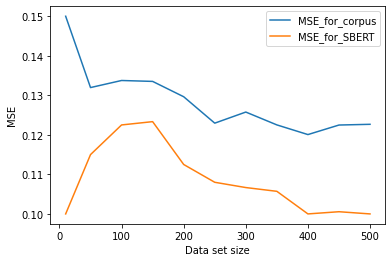

In [138]:
plt.plot( input_size , MSE_for_corpus,label="MSE_for_corpus")
plt.plot( input_size , MSE_for_SBERT ,label="MSE_for_SBERT")
plt.legend()
plt.xlabel("Data set size")
plt.ylabel("MSE")
plt.show()

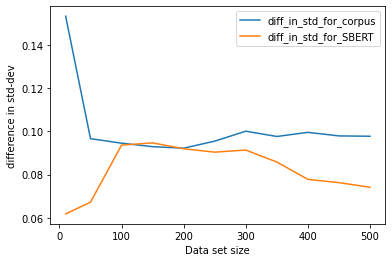

In [139]:
plt.plot( input_size , diff_in_std_for_corpus,label="diff_in_std_for_corpus")
plt.plot( input_size , diff_in_std_for_SBERT ,label="diff_in_std_for_SBERT")
plt.legend()
plt.xlabel("Data set size")
plt.ylabel("difference in std-dev")
plt.show()

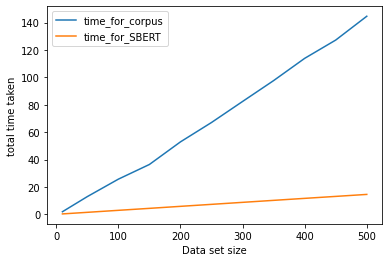

In [140]:
plt.plot( input_size , time_for_corpus,label="time_for_corpus")
plt.plot( input_size , time_for_SBERT ,label="time_for_SBERT")
plt.legend()
plt.xlabel("Data set size")
plt.ylabel("total time taken")
plt.show()